In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('/Users/yatinpatel/Desktop/House-price-Prediction/AmesHousing.csv')
df.isnull()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,False,False,True,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False


In [6]:
# calculate the missing values in each variable
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [7]:
# calculate the total missing value
df.isnull().sum().sum()

13997

In [11]:
# calculate the percentage of missing values in each variable 
df.isnull().mean()
df.isnull().mean() * 100

Order              0.000000
PID                0.000000
MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 82, dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

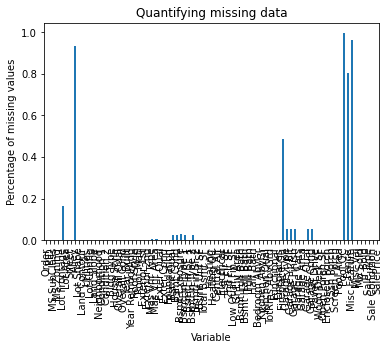

In [12]:
# Visualize the percentage of missing values in a bar chart
import matplotlib.pyplot as plt
fig = plt.figure()

df.isnull().mean().plot.bar()

plt.ylabel('Percentage of missing values')
plt.xlabel('Variable')
plt.title('Quantifying missing data')


In [13]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", len(numeric_columns))

categorical_columns = df.select_dtypes(include=['object']).columns
print("Catagorical columns:", len(categorical_columns))

Numeric columns: 39
Catagorical columns: 43


In [14]:
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [15]:
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [16]:
threshold = 0.7 * len(df)
df.dropna(axis=1, thresh=threshold, inplace=True)


In [17]:
initial_rows = df.shape[0]

#drop duplicate rows
df.drop_duplicates(inplace=True)

#print the number of duplicates removed
print(f'Removed {initial_rows - df.shape[0]} duplicate rows.')

Removed 0 duplicate rows.
